In [1]:
from __future__ import absolute_import, division, print_function

In [1]:
# Data preprocessing 
# Augmentation removed for testing 

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batch_size=32

test_aug = ImageDataGenerator(rescale=1.0/255)



test_generator = test_aug.flow_from_directory('GoT-images/test',
                                                   target_size=(224,224),
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   class_mode='categorical')

Using TensorFlow backend.


Found 1774 images belonging to 2 classes.


In [1]:
from keras.layers import Conv2D, Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization 

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=3, strides=2, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=256, kernel_size=3, strides=2, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=3, strides=2, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=512, kernel_size=3, strides=2, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=1024, kernel_size=3, strides=2, padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))



model.add(Flatten())

model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.7)) 

model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

model.add(Dense(2, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
__________

In [4]:
from keras.optimizers import Adam

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('saved_models/ver2.0_weights_final.hdf5')

In [7]:
# Evaluate model on test dataset

nb_test = 1774.0

model.evaluate_generator(test_generator, steps=nb_test//batch_size)

[0.58803803577215064, 0.80711825508474622]

In [6]:
model.metrics_names

# Loss = 0.59, Accuracy = 0.81 

['loss', 'acc']

In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from keras.preprocessing import image                  
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline  

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 

import os

os.chdir('/root/GoT')

In [5]:
# Load the sample data and convert into tensors 

def load_dataset(path):
    data = load_files(path)
    GoT_files = np.array(data['filenames'])
    GoT_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return GoT_files, GoT_targets

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [7]:
# Pre-process the data for Keras

sample_files, sample_targets = load_dataset('sample/')
sample_tensors = paths_to_tensor(sample_files).astype('float32')/255

100%|██████████| 17/17 [00:00<00:00, 28.19it/s]


In [8]:
# Function that takes a image via file path and classified using the final CNN model

def GoT_algo(img_path):
    test_img = path_to_tensor(img_path).astype('float32')/255
    result = np.argmax(model.predict(test_img))
    
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
    if result == 1:
        print('Beware: Game of Thrones content detected!')
    else:
        print('This image is not related to Game of Thrones.')

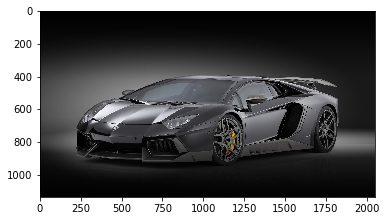

This image is not related to Game of Thrones.


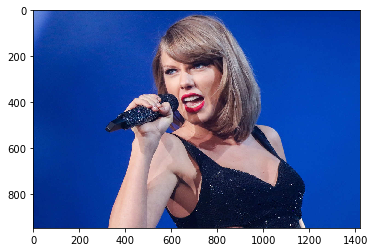

Beware: Game of Thrones content detected!


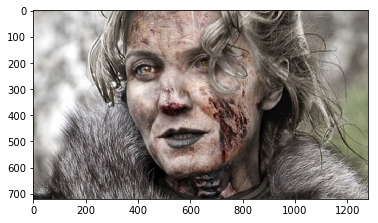

Beware: Game of Thrones content detected!


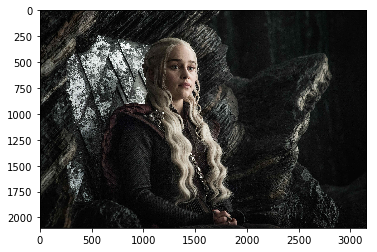

Beware: Game of Thrones content detected!


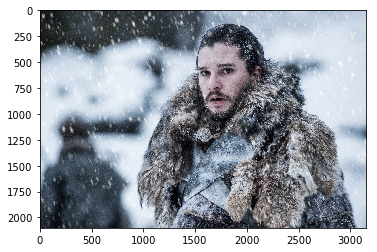

Beware: Game of Thrones content detected!


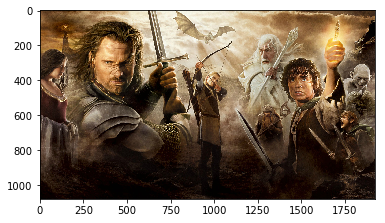

Beware: Game of Thrones content detected!


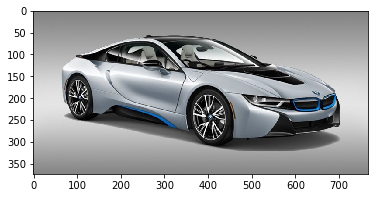

This image is not related to Game of Thrones.


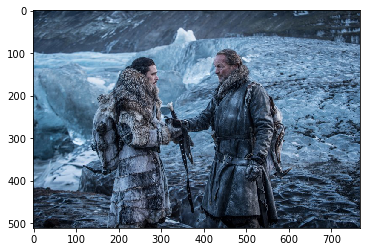

Beware: Game of Thrones content detected!


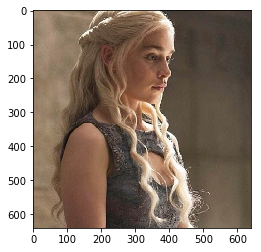

Beware: Game of Thrones content detected!


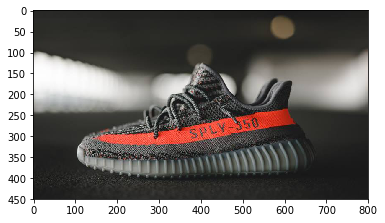

This image is not related to Game of Thrones.


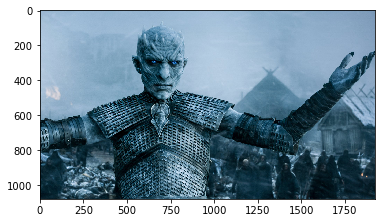

Beware: Game of Thrones content detected!


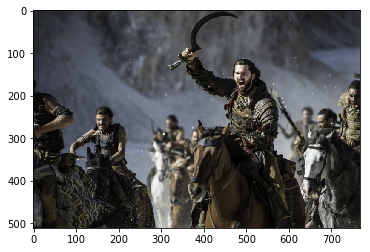

Beware: Game of Thrones content detected!


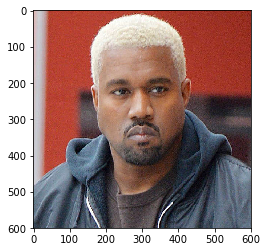

Beware: Game of Thrones content detected!


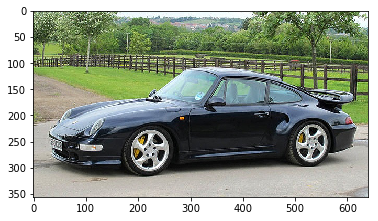

This image is not related to Game of Thrones.


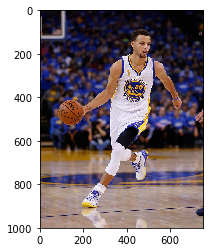

This image is not related to Game of Thrones.


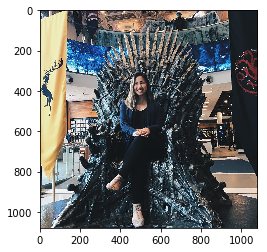

Beware: Game of Thrones content detected!


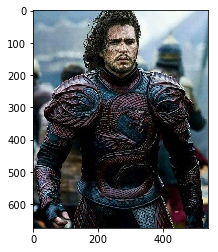

Beware: Game of Thrones content detected!


In [9]:
for path in sample_files:
    GoT_algo(path)